In [1]:
#Analysis of co2 levels
import pandas as pd

df_co2=pd.read_csv("co2.csv", comment='"', header=[0,1,2])
df_co2.head()

date_col = df_co2.columns[3]
co2_col = df_co2.columns[4]

MONTH_COL = 1
YEAR_COL = 0
CO2_COL = 4


#Need to append less accurate date column as per instructions
t_i_new =[(i+0.5)/12 for i in range(len(df_co2))]
df_co2['t_i_new'] = t_i_new

#df_co2.head()

co2_raw = df_co2[df_co2[co2_col] != -99.99][[df_co2.columns[3],df_co2.columns[4],df_co2.columns[10]]]
full_co2_raw = df_co2[df_co2[co2_col] != -99.99] #used for periodic signal detection below
co2_raw[df_co2.columns[3]] = co2_raw[df_co2.columns[3]]-1958

nP_co2_raw = co2_raw.to_numpy()


#Reshape your data either using array.reshape(-1, 1) if your data has a single feature
t_i = nP_co2_raw[:,0].reshape(-1,1)
co2 = nP_co2_raw[:,1].reshape(-1,1)
t_i_new = nP_co2_raw[:,2].reshape(-1,1)

df_co2.head()

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally,t_i_new
,,,,,,adjusted,,adjusted fit,filled,adjusted filled,
,,,Excel,,[ppm],[ppm],[ppm],[ppm],[ppm],[ppm],
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,0.041667
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,0.125000
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43,0.208333
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16,0.291667
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71,0.375000


In [2]:
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
#Its a time series so you need continuous data not train_test_split fit on the first 80% to explain the final 20%
split_point = int(0.8*len(co2_raw))
X_train_2,X_test_2,y_train_2,y_test_2 = t_i[0:split_point], t_i[split_point:], co2[0:split_point], co2[split_point:]

model = sklearn.linear_model.LinearRegression().fit(X_train_2,y_train_2)
print(f"alpha0:{model.intercept_} alpha1:{model.coef_}")
y_pred_2 = model.predict(X_test_2)
print(f"RMSE: {sklearn.metrics.mean_squared_error(y_test_2,y_pred_2,squared=False)} MAPE:{sklearn.metrics.mean_absolute_percentage_error(y_test_2,y_pred_2)*100}")
y_train2_pred = model.predict(X_train_2)

alpha0:[308.99546949] alpha1:[[1.40668098]]
RMSE: 10.642011413148976 MAPE:2.4505275995447513


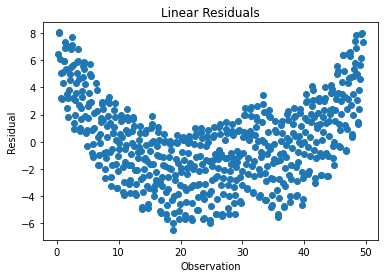

In [3]:
import matplotlib.pyplot as plt
def plot_residuals(x,y,title):
    #plt.scatter(X_train_2,y_train_2-y_train2_pred)
    plt.scatter(x,y)
    plt.title(title)
    plt.xlabel("Observation")
    plt.ylabel("Residual")
    plt.show()

plot_residuals(X_train_2,y_train_2-y_train2_pred,"Linear Residuals")

#Residuals for Linear model are not random, showing that the model is not sufficiently powerful to be able to capture the data

In [4]:
#Quadratic model
#Now fit a quadratic model F2t = B0+B1t + B2t^2
quad = sklearn.preprocessing.PolynomialFeatures(2,include_bias=False) #not using biad since getting the model intercept below
quad_X_train_2 = quad.fit_transform((X_train_2)) #generates quadratic model
quad_X_test_2 = quad.fit_transform((X_test_2)) #generates quadratic model
quad_model = sklearn.linear_model.LinearRegression().fit(quad_X_train_2,y_train_2)
print(f"alpha0:{quad_model.intercept_} alphas:{quad_model.coef_}")
quad_y_pred_2 = quad_model.predict(quad_X_test_2)
print(f"RMSE: {sklearn.metrics.mean_squared_error(y_test_2,quad_y_pred_2,squared=False)} MAPE:{sklearn.metrics.mean_absolute_percentage_error(y_test_2,quad_y_pred_2)*100}")
quad_y_train2_pred = quad_model.predict(quad_X_train_2)

alpha0:[314.10295065] alphas:[[0.80213511 0.01211779]]
RMSE: 2.502807371922247 MAPE:0.5322789167375737


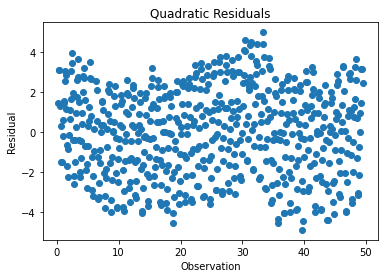

In [5]:
plot_residuals(X_train_2,y_train_2-quad_y_train2_pred,"Quadratic Residuals")


#Residuals for quadratic model are much more random than for the linear model, however there may be evidence of 2 concave upwards trend - so evaluation a cubic model

In [6]:
#Cubic model

#Now fit a quadratic model F2t = B0+B1t + B2t^2
cub = sklearn.preprocessing.PolynomialFeatures(3,include_bias=False) #not using biad since getting the model intercept below
cub_X_train_2 = cub.fit_transform((X_train_2)) #generates quadratic model
cub_X_test_2 = cub.fit_transform((X_test_2)) #generates quadratic model
cub_model = sklearn.linear_model.LinearRegression().fit(cub_X_train_2,y_train_2)
print(f"alpha0:{cub_model.intercept_} alphas:{cub_model.coef_}")
cub_y_pred_2 = cub_model.predict(cub_X_test_2)
print(f"RMSE: {sklearn.metrics.mean_squared_error(y_test_2,cub_y_pred_2,squared=False)} MAPE:{sklearn.metrics.mean_absolute_percentage_error(y_test_2,cub_y_pred_2)*100}")
cub_y_train2_pred = cub_model.predict(cub_X_train_2)

alpha0:[314.86089144] alphas:[[ 6.24869938e-01  2.09624454e-02 -1.18397534e-04]]
RMSE: 4.151525341769761 MAPE:0.8487342853147364


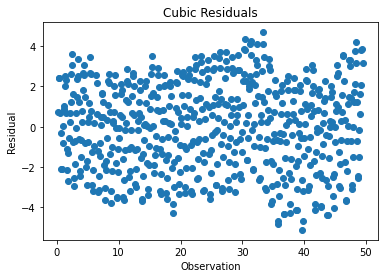

In [7]:
plot_residuals(X_train_2,y_train_2-cub_y_train2_pred,"Cubic Residuals")


#Residuals for cubic model very closely resenble those for the quadratic model, indicating that the quadratic model is sufficiently powerful to model the data
Next step: Fit a periodic trend. These are monthly CO2 figures and it is reasonable to expect that there may be a seasonal component. This can be investigated by averaging the residuals displayed in each month over the 62 years of data

In [8]:
#Place raw quadratic fit and resduals into the DataFrame
#full_co2_raw["quad_fit"] = quad_model.predict(quad.fit_transform(full_co2_raw["t_i_new"].values.reshape(-1,1)))

#full_co2_raw.loc[:,("quad_fit")] = quad_model.predict(quad.fit_transform(full_co2_raw.loc[:,("t_i_new")].values.reshape(-1,1)))
quad_fit = quad_model.predict(quad.fit_transform(full_co2_raw.loc[:,("t_i_new")].values.reshape(-1,1)))
full_co2_raw.loc[:,("quad_fit")] = quad_fit
quad_residual = full_co2_raw.loc[:,(full_co2_raw.columns[4])] - full_co2_raw.loc[:,("quad_fit")]
full_co2_raw.loc[:,("quad_residual")] = quad_residual
full_co2_raw.head()
split_point = int(0.8*len(full_co2_raw))
train_co2_raw = full_co2_raw.iloc[:split_point,:]
train_co2_raw.tail()
#train_co2_raw.groupby(["Mn"]).mean()

C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is 

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally,t_i_new,quad_fit,quad_residual
,,,,,,adjusted,,adjusted fit,filled,adjusted filled,,,
,,,Excel,,[ppm],[ppm],[ppm],[ppm],[ppm],[ppm],,,
589,2007,2,39128,2007.1260,383.71,382.98,383.61,382.87,383.71,382.98,49.125000,382.751283,0.958717
590,2007,3,39156,2007.2027,384.34,382.84,384.52,383.01,384.34,382.84,49.208333,382.917426,1.422574
591,2007,4,39187,2007.2877,386.23,383.53,385.89,383.17,386.23,383.53,49.291667,383.083738,3.146262
592,2007,5,39217,2007.3699,386.41,383.13,386.61,383.33,386.41,383.13,49.375000,383.250217,3.159783
593,2007,6,39248,2007.4548,385.87,383.38,385.95,383.49,385.87,383.38,49.458333,383.416865,2.453135


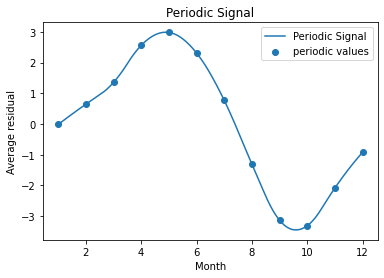

In [9]:
residuals = train_co2_raw.groupby(train_co2_raw.columns[MONTH_COL]).mean()["quad_residual"].to_numpy()
from scipy import interpolate
import numpy as np
f = interpolate.interp1d(range(1,13),residuals,"quadratic")
x_int = np.arange(1,12,0.01)
y_int = f(x_int) 
plt.plot(x_int,y_int,label="Periodic Signal")
plt.scatter(range(1,13),residuals,label="periodic values")
plt.legend()
plt.title("Periodic Signal")
plt.xlabel("Month")
plt.ylabel("Average residual")
plt.show()

In [10]:
#We have a quadratic fit, and a clear, plausible, periodic signal as shown in the residuals so adjust the quadratic fit accordingly
months = full_co2_raw.loc[:,(train_co2_raw.columns[1])].values-1
full_co2_raw.loc[:,("period_adj_quad")]= full_co2_raw.loc[:,("quad_fit")] + residuals[months-1]
full_co2_raw.head()

C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally,t_i_new,quad_fit,quad_residual,period_adj_quad
,,,,,,adjusted,,adjusted fit,filled,adjusted filled,,,,
,,,Excel,,[ppm],[ppm],[ppm],[ppm],[ppm],[ppm],,,,
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43,0.208333,314.270588,1.429412,314.913410
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16,0.291667,314.337938,3.112062,315.689943
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71,0.375000,314.405455,3.104545,316.963745
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.21,315.86,315.19,0.541667,314.540996,1.319004,316.853887
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19,0.625000,314.609019,0.320981,315.381782


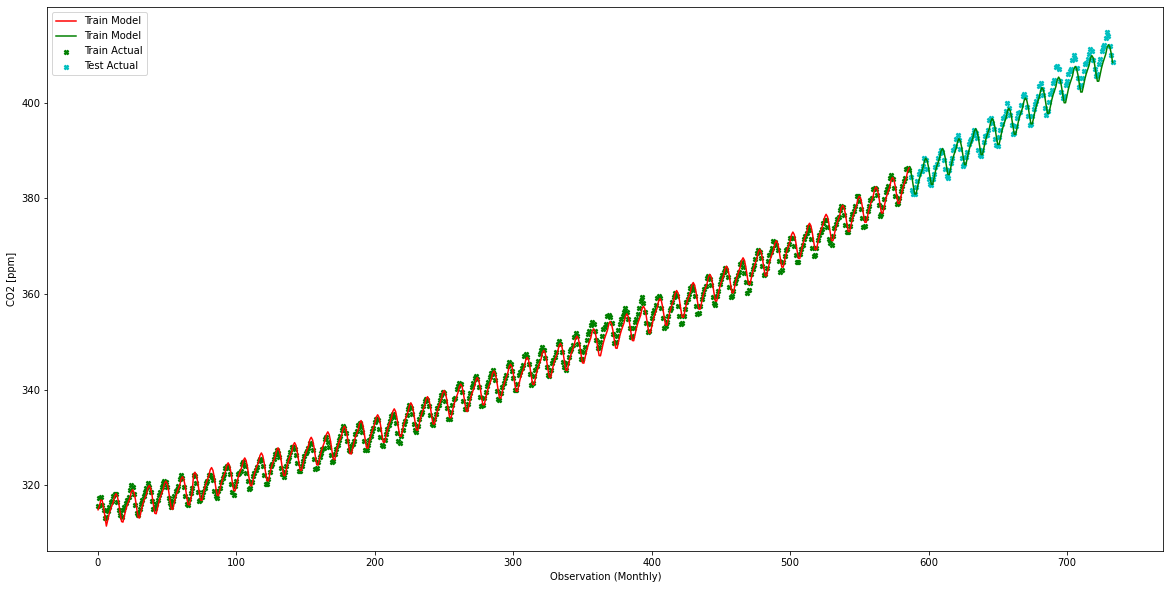

In [11]:
#Plot: 
#full set of data split train and test
#Final model prediction
#full_co2_raw.info() # shows full 734 rows and -999 stripped out
train_actual = full_co2_raw.iloc[:split_point,4].to_numpy()
train_model = full_co2_raw.iloc[:split_point,full_co2_raw.columns.get_loc("period_adj_quad")].to_numpy()


test_actual = full_co2_raw.iloc[split_point:,4].to_numpy()
test_model = full_co2_raw.iloc[split_point:,full_co2_raw.columns.get_loc("period_adj_quad")].to_numpy()



plt.figure(figsize=(20,10))
plt.plot(range(len(train_actual)),train_model,label="Train Model",color='r')
plt.scatter(range(len(train_actual)),train_actual,label="Train Actual",color='g',s=20,marker='X')
plt.plot(range(len(train_actual),len(train_actual)+len(test_actual)),test_model,label="Train Model",color='g')
plt.scatter(range(len(train_actual),len(train_actual)+len(test_actual)),test_actual,label="Test Actual",color='c',s=20,marker='X')
plt.legend()
plt.xlabel("Observation (Monthly)")
plt.ylabel("CO2 [ppm]")
plt.show()



In [12]:
#RMSE and MAPE for the final model
print(f"RMSE: {sklearn.metrics.mean_squared_error(test_actual,test_model,squared=False)} MAPE:{sklearn.metrics.mean_absolute_percentage_error(test_actual,test_model)*100}")
full_co2_raw.loc[:,("period_adj_quad_residual")]= full_co2_raw.loc[:,(full_co2_raw.columns[4])] - full_co2_raw.loc[:,("period_adj_quad")]
full_co2_raw.head()
full_co2_raw.tail()

RMSE: 1.7756362120337918 MAPE:0.3791947526359034


C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally,t_i_new,quad_fit,quad_residual,period_adj_quad,period_adj_quad_residual
,,,,,,adjusted,,adjusted fit,filled,adjusted filled,,,,,
,,,Excel,,[ppm],[ppm],[ppm],[ppm],[ppm],[ppm],,,,,
736,2019,5,43600,2019.3699,414.83,411.42,414.53,411.12,414.83,411.42,61.375000,408.980381,5.849619,411.538671,3.291329
737,2019,6,43631,2019.4548,413.96,411.38,413.89,411.33,413.96,411.38,61.458333,409.171264,4.788736,412.150602,1.809398
738,2019,7,43661,2019.5370,411.85,411.03,412.32,411.54,411.85,411.03,61.541667,409.362316,2.487684,411.675207,0.174793
739,2019,8,43692,2019.6219,410.08,411.62,410.17,411.75,410.08,411.62,61.625000,409.553537,0.526463,410.326300,-0.246300
740,2019,9,43723,2019.7068,408.55,412.06,-99.99,-99.99,408.55,412.06,61.708333,409.744925,-1.194925,408.440174,0.109826


* Without correcting for periodicity: RMSE: 2.502807371922247 MAPE:0.5322789167375737
* Following correction for periodicity: RMSE: 1.7756362120337918 MAPE:0.3791947526359034

* I.E. Correcting for periodicity has reduced the mean percentage error by 29%

In [13]:
print(f"{full_co2_raw['period_adj_quad_residual'].min()} {full_co2_raw['period_adj_quad_residual'].max()}")

-3.56639404572104 4.181991639446892
